# **Implementation Task 1**
## **For JMM**



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('posal.csv')
print(data.shape)
print(data)

(10, 3)
            Position  Level  Salary
0   Business Analyst      1      45
1  Junior Consultant      2      50
2  Senior Consultant      3      60
3            Manager      4      80
4    Country Manager      5     110
5     Region Manager      6     150
6            Partner      7     200
7     Senior Partner      8     300
8            C-level      9     500
9                CEO     10    1000


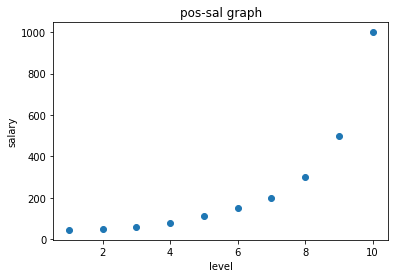

In [9]:
x1 = data['Level'].values
sal=data['Salary'].values
plt.scatter(x1, sal)
plt.title("pos-sal graph")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()
x1 = data['Level'].values
x1=x1/np.max(x1)
x2 = x1**2
x2=x2/np.max(x2)
x3 = x1**3
x3 = x3/np.max(x3)
x4 = x1**4 
x4 = x4/np.max(x4)
sal=data['Salary'].values
m = len(x1)
x0 = np.ones(m)
X=np.vstack((x0, x1, x2, x3, x4)).T
theta = np.array([0, 0, 0, 0, 0])
Y = np.array(sal)

In [10]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = np.zeros((iterations))
    m = len(Y)
    for iteration in range(iterations):
        h_theta = X.dot(theta) # Model value
        loss = h_theta - Y # Difference b/w model and actual Y
        gradient = X.T.dot(loss) / m # All partial derivatives in one line
        theta = theta - alpha * gradient # Updating theta
        cost = cost_function(X, Y, theta) # New cost value
        cost_history[iteration] = cost
    return theta, cost_history

Initial Cost 71456.25
Final Coefficients [  63.28019997 -157.87131175   72.80406293  335.72158094  563.71536939]
Final Cost 1785.0262809395172


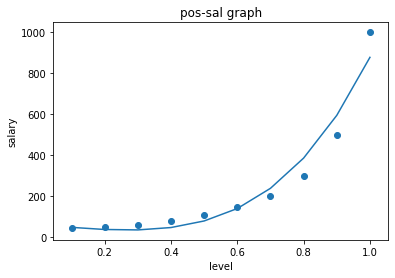

In [11]:
# learning rate
alpha = 0.0001
inital_cost = cost_function(X, Y, theta)
print('Initial Cost', inital_cost)
# 1000000 Iterations
finaltheta, cost_history = gradient_descent(X, Y, theta, alpha, 1000000)
print('Final Coefficients', finaltheta) # final model parameters theta
print('Final Cost', cost_history[-1]) # final cost
h_theta = X.dot(finaltheta)  # Final Model
plt.scatter(x1, sal)
plt.plot(x1,h_theta)
plt.title("pos-sal graph")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

## Lets do predecition for level 6.5 lets say, to check model output on a time series, continous value. 

In [12]:
#Predictions
sample = np.array([1,6.5/10,(6.5/10)**2,(6.5/10)**3,(6.5/10)**4])
predsal = sample.dot(finaltheta)
print('COST for 6.5', predsal)


COST for 6.5 184.24781974142473
